# Perceptron
* It is an algorithm as well as a mathematical function.
* Building block of deep learning.
* Binary classifier.
* Used of linearly separable data.

In [1]:
# Libraries uses
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns

In [2]:
iris_labels = {"setosa": 1, "versicolor": 0, "virginica": 0}

In [3]:
iris = sns.load_dataset("iris")
iris.species = iris.species.map(iris_labels)
new_iris = iris.drop(columns=["sepal_length", "sepal_width"], axis=1)
# new_iris = new_iris.query("species != 2")
new_iris.head()

,petal_length,petal_width,species
0,1.4,0.2,1
1,1.4,0.2,1
2,1.3,0.2,1
3,1.5,0.2,1
4,1.4,0.2,1


<Axes: xlabel='petal_length', ylabel='petal_width'>

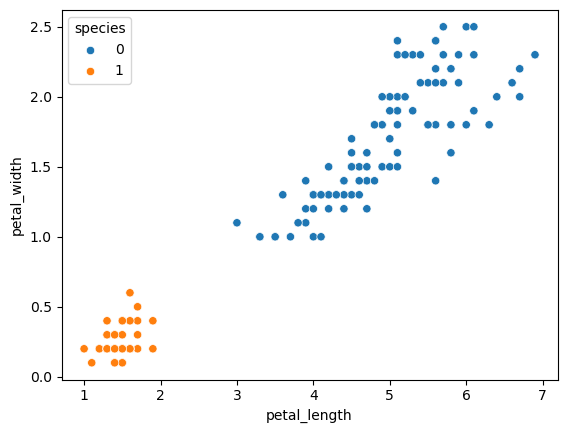

In [4]:
sns.scatterplot(data=new_iris, x="petal_length", y="petal_width", hue="species")

We can see that the above data is linearly separable. Let's create a perceptron to differentiate between these classes.

In [5]:
def perceptron(X, y, lr=1, epochs=1000):
    def step_function(z):
        return 1 if z > 0 else 0

    X = np.insert(X, 0, 1, axis=1)
    rows, columns = X.shape
    weights = np.ones(columns)

    for _ in range(epochs):
        j = np.random.randint(0, rows)
        X_j = X[j]
        y_hat = step_function(np.dot(X_j, weights))
        weights += lr * (y[j] - y_hat) * X_j

    return weights[0], weights[1:]

In [6]:
X = new_iris.iloc[:, :-1]
y = new_iris.iloc[:, -1]
bias, weights = perceptron(X, y, lr=1, epochs=10000)
print(bias, weights)

5.0 [-1.2 -1.9]


In [9]:
m = -(weights[0]/weights[1])
b = -(bias/weights[1])
x_input = np.linspace(-3,7,250)
y_input = m*x_input + b

(-1.0, 3.0)

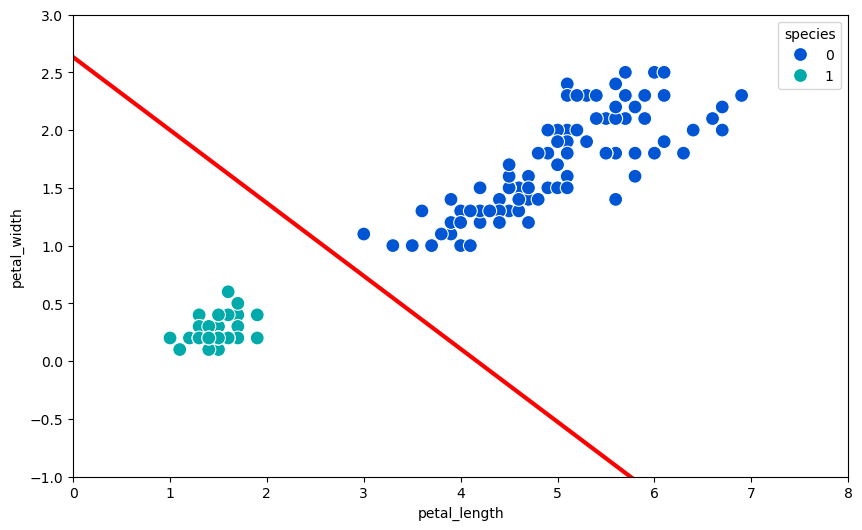

In [10]:
plt.figure(figsize=(10, 6))
sns.lineplot(x=x_input, y=y_input, color="red", linewidth=3)
sns.scatterplot(
    data=new_iris,
    x="petal_length",
    y="petal_width",
    hue="species",
    palette="winter",
    s=100,
    legend=True,
)
plt.xlim(0, 8)
plt.ylim(-1, 3)

The above line represents a perceptron dividing the dataset. This is a simple perceptron which uses a step function as an activation function. This function works well for linearly separable data but for non-linear data we need another function which can separate it like sigmoid, ReLu, tanh, etc.